# This notebook serves as a demo of
# how to get the CO2 Differential Cross Section
# Assuming a unifrom sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import sys
sys.path.append("..")

from ContrastEstimation import util, IntensityEstimation

In [2]:
# Get the molecule structure
"""
One can either define the molecule structure or 
use a PDB file to load existing structure
or just select some molecules
that I have saved to the module
"""
my_molecule = util.get_molecule_from_pdb("../pdb_files/co2.pdb")

# Show the source code of how I have defined a molecule for calculation.
util.show_formated_molecule_structure(my_molecule)

[
[ 'C', np.array([-1.194,0.58,0.312]),],
[ 'O', np.array([0.122,0.548,0.312]),],
[ 'O', np.array([-2.51,0.611,0.312]),],
],


In [3]:
density_list = np.linspace(0.1, 1, 10)  # g / cm^3
q_list  = np.linspace(0, 5, 100)  # A^-1
diff_crosssection = np.zeros((10, 100))

for x in range(10):
    for y in range(100):
        diff_crosssection[x,y] = IntensityEstimation.get_differential_crosssection_for_uniform_sample(
            molecule_structure=my_molecule,
            q_detector_in_A = q_list[y],
            density_g_cm3 = density_list[x])

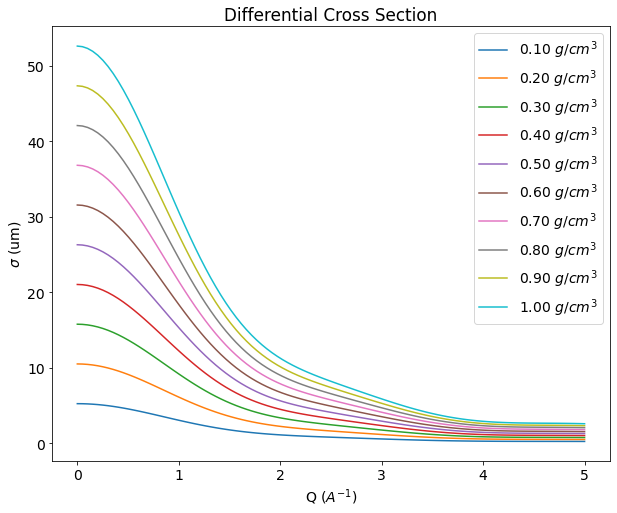

In [4]:
fig, axis = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(8)
fig.set_figwidth(10)

for x in range(10):
    axis.plot(q_list,
              diff_crosssection[x,:],
              label="{:.2f} $g/cm^3$".format(density_list[x]))

axis.set_xlabel("Q ($A^{-1}$)")
axis.set_ylabel("$\sigma$ (um)")
axis.set_title("Differential Cross Section")
axis.legend()
plt.show()